In [1]:
with open('gender violence.txt', 'r') as file:
    data_description = file.read()

print(data_description)


id: Represents the unique identifier for each individual.
gender: Indicates the gender of the individual (e.g., female or male).
age: Represents the age of the individual in years.
education: Indicates the level of education completed by the individual (e.g., high school, college, or graduate school).
income: Represents the income level of the individual (e.g., low or high).
employment: Indicates the employment status of the individual (e.g., unemployed, employed, or self-employed).
marital_status: Represents the marital status of the individual (e.g., single, married, or divorced).
number_of_children: Indicates the number of children the individual has.
household_size: Represents the size of the individual's household.
location: Indicates the location of the individual's residence (e.g., urban, suburban, or rural).
violence_type: Represents the type of violence experienced by the individual (e.g., physical, verbal, or sexual).
violence_frequency: Indicates the frequency of violence in

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="white")



In [3]:
data = pd.read_csv('gender_violence.csv')

In [4]:
# 4a:  Display the first 5 rows of the dataset
data.head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration of Violence,Impact Score
0,A1234567,female,20.0,high_school,low,unemployed,single,0.0,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.0,college,high,employed,married,1.0,2,suburban,verbal,once_a_year,moderate,1.8,5.2
2,C2345678,female,40.0,graduate_school,high,self-employed,NaN,2.0,3,rural,sexual,once_a_week,mild,3.2,3.9
3,D8765432,female,NaN,NaN,high,unemployed,single,0.0,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.0,college,NaN,employed,married,NaN,2,suburban,verbal,once_a_month,moderate,2.9,6.1


In [5]:
#  4b: Calculate the total number of records
data.shape

(242, 15)

In [6]:
#4c: Identify and handle missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   198 non-null    float64
 3   education             198 non-null    object 
 4   income                232 non-null    object 
 5   employment            234 non-null    object 
 6   marital_status        232 non-null    object 
 7   number_of_children    235 non-null    float64
 8   household_size        237 non-null    object 
 9   location              241 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration of Violence  242 non-null    float64
 14  Impact Score          241 non-null    float64
dtypes: float64(4), object(1

## alternatively

In [7]:
data.isnull().sum()

id                       0
gender                   0
age                     44
education               44
income                  10
employment               8
marital_status          10
number_of_children       7
household_size           5
location                 1
violence_type            0
violence_frequency       0
violence_severity        0
Duration of Violence     0
Impact Score             1
dtype: int64

In [8]:
data.bfill().head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration of Violence,Impact Score
0,A1234567,female,20.0,high_school,low,unemployed,single,0.0,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.0,college,high,employed,married,1.0,2,suburban,verbal,once_a_year,moderate,1.8,5.2
2,C2345678,female,40.0,graduate_school,high,self-employed,single,2.0,3,rural,sexual,once_a_week,mild,3.2,3.9
3,D8765432,female,31.0,college,high,unemployed,single,0.0,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.0,college,high,employed,married,2.0,2,suburban,verbal,once_a_month,moderate,2.9,6.1


In [9]:
data.ffill().head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration of Violence,Impact Score
0,A1234567,female,20.0,high_school,low,unemployed,single,0.0,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.0,college,high,employed,married,1.0,2,suburban,verbal,once_a_year,moderate,1.8,5.2
2,C2345678,female,40.0,graduate_school,high,self-employed,married,2.0,3,rural,sexual,once_a_week,mild,3.2,3.9
3,D8765432,female,40.0,graduate_school,high,unemployed,single,0.0,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.0,college,high,employed,married,0.0,2,suburban,verbal,once_a_month,moderate,2.9,6.1


In [10]:
data.age = data.age.fillna(data.age.mean())
data["education"] = data["education"].fillna(data["education"].mode()[0])
data["income"] = data["income"].fillna(data["income"].mode()[0])
data["employment"] = data["employment"].fillna(data["employment"].mode()[0])
data["marital_status"] = data["marital_status"].fillna(data["marital_status"].mode()[0])
data["number_of_children"] = data["number_of_children"].fillna(data["number_of_children"].mean())
data["household_size"] = data["household_size"].fillna(data["household_size"].mean())
data["location"] = data["location"].fillna(data["location"].mode()[0])
data["Impact Score"] = data["Impact Score"].fillna(data["Impact Score"].mean())


TypeError: can only concatenate str (not "int") to str

In [11]:
data.household_size.unique()

array(['1', '2', '3', nan, 'urban'], dtype=object)

In [12]:
data[data.household_size == "urban"]

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration of Violence,Impact Score
47,V6547892,male,38.0,graduate_school,high,self-employed,single,3.0,urban,verbal,once_a_month,mild,2.5,3.7,NaN


In [13]:
data = data.drop(data.household_size[data.household_size == "urban"].index)

In [14]:
data.age = data.age.fillna(data.age.mean())
data["education"] = data["education"].fillna(data["education"].mode()[0])
data["income"] = data["income"].fillna(data["income"].mode()[0])
data["employment"] = data["employment"].fillna(data["employment"].mode()[0])
data["marital_status"] = data["marital_status"].fillna(data["marital_status"].mode()[0])
data["number_of_children"] = data["number_of_children"].fillna(data["number_of_children"].mean())
data["household_size"] = data["household_size"].fillna(data["household_size"].mode()[0])
data["location"] = data["location"].fillna(data["location"].mode()[0])
data["Impact Score"] = data["Impact Score"].fillna(data["Impact Score"].mean())


In [15]:
data.isnull().sum()

id                      0
gender                  0
age                     0
education               0
income                  0
employment              0
marital_status          0
number_of_children      0
household_size          0
location                0
violence_type           0
violence_frequency      0
violence_severity       0
Duration of Violence    0
Impact Score            0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

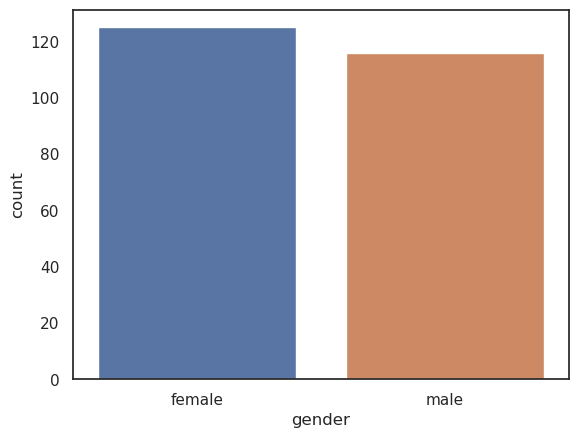

In [16]:
# 3d: Create a plot with desired information
sns.countplot(x='gender', data=data)

<Axes: xlabel='education', ylabel='count'>

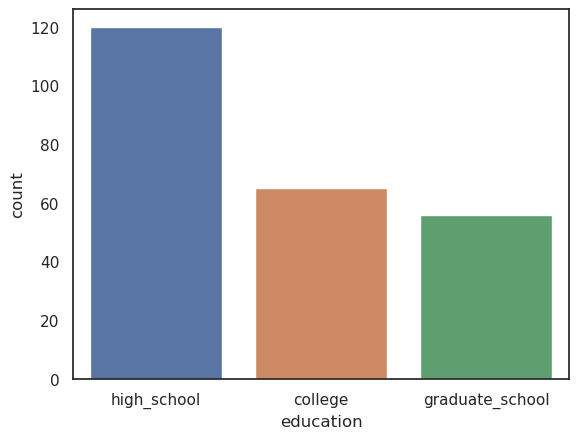

In [17]:
sns.countplot(x='education', data=data)

<Axes: xlabel='employment', ylabel='count'>

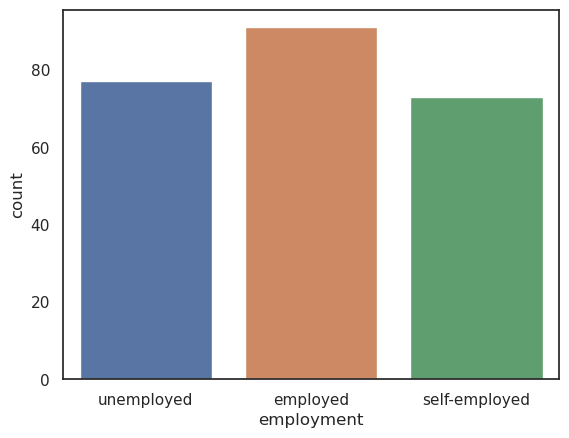

In [18]:
sns.countplot(x='employment', data=data)


<Axes: xlabel='marital_status', ylabel='count'>

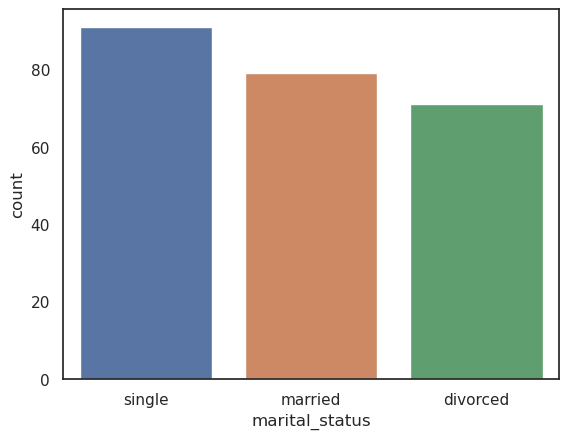

In [19]:
sns.countplot(x='marital_status', data=data)

In [20]:
# 3e: Average number of children
average_children = data['number_of_children'].mean()
print("Average number of children:", average_children)

Average number of children: 0.9489714840646244


### obsevation
1. 
2.
3.
4. outliers in Impact Score

In [21]:
data.describe()

,age,number_of_children,Duration of Violence,Impact Score
count,241.000000,241.000000,241.000000,241.000000
mean,32.091747,0.948971,2.302490,6.700415
std,4.153094,0.804635,0.512585,6.760119
min,20.000000,0.000000,-2.200000,3.200000
25%,30.000000,0.000000,2.000000,4.500000
50%,32.116162,1.000000,2.300000,5.900000
75%,35.000000,2.000000,2.600000,7.800000
max,41.000000,2.000000,3.200000,94.000000


<Axes: xlabel='Impact Score'>

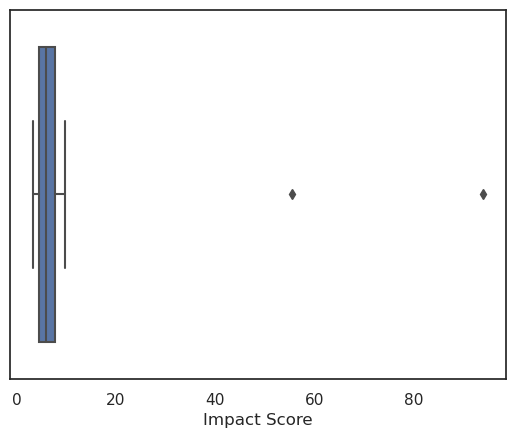

In [22]:
sns.boxplot(x = data['Impact Score'])

<Axes: xlabel='Duration of Violence'>

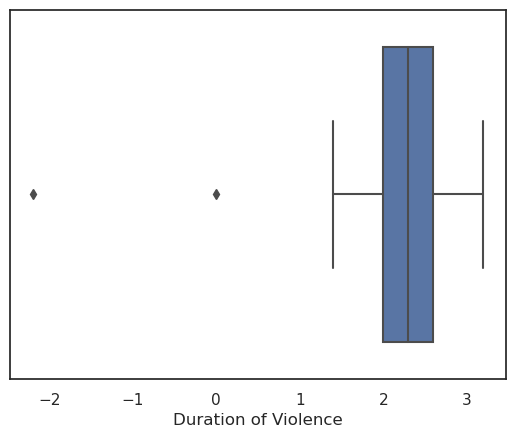

In [23]:
sns.boxplot(x = data['Duration of Violence'])

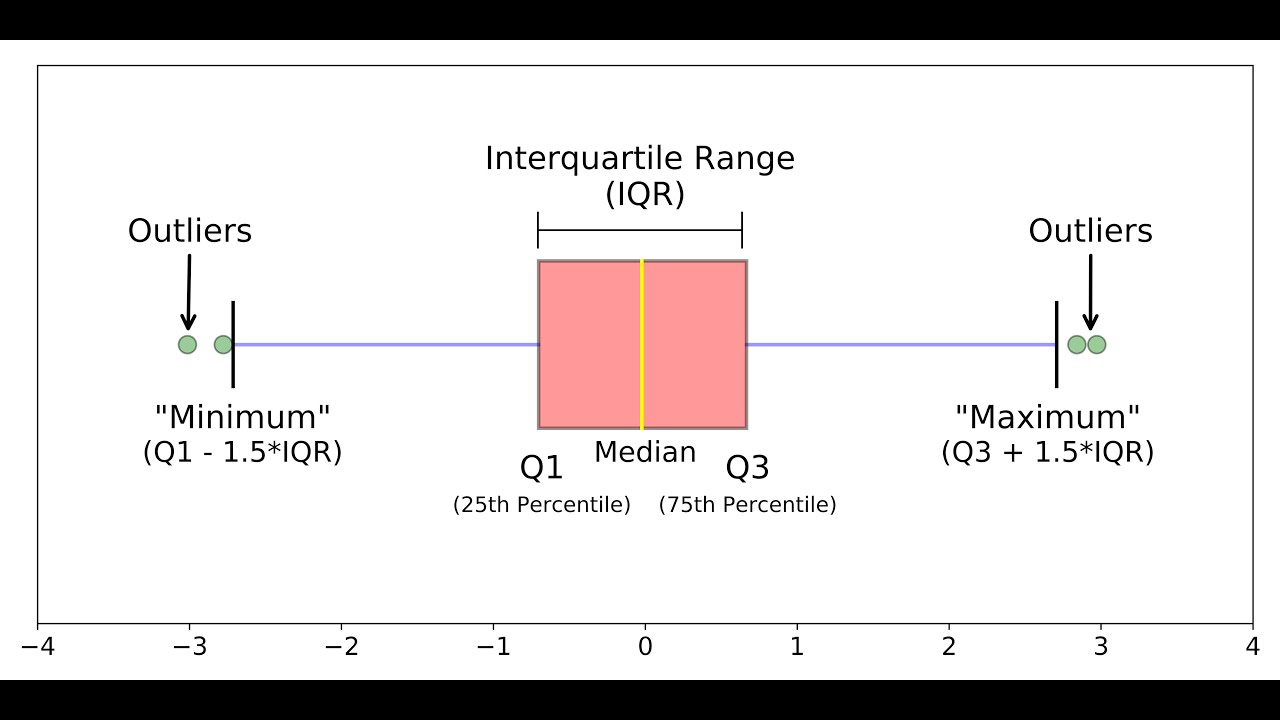

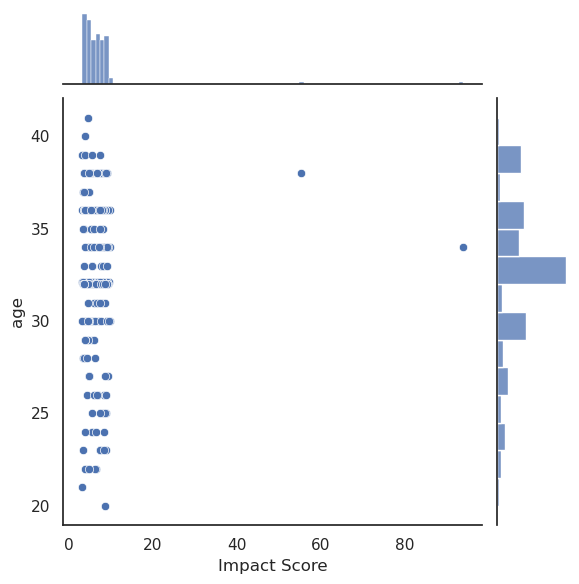

In [24]:
sns.jointplot(x=data["Impact Score"], y= data.age )

In [25]:
data.head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration of Violence,Impact Score
0,A1234567,female,20.000000,high_school,low,unemployed,single,0.000000,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.000000,college,high,employed,married,1.000000,2,suburban,verbal,once_a_year,moderate,1.8,5.2
2,C2345678,female,40.000000,graduate_school,high,self-employed,single,2.000000,3,rural,sexual,once_a_week,mild,3.2,3.9
3,D8765432,female,32.116162,high_school,high,unemployed,single,0.000000,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.000000,college,low,employed,married,0.957447,2,suburban,verbal,once_a_month,moderate,2.9,6.1


In [66]:
data['household_size'].unique().tolist()

['1', '2', '3']

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [49]:
data["gender"] = encoder.fit_transform(data["gender"])
data["income"] = encoder.fit_transform(data["income"])

In [63]:
data.head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration of Violence,Impact Score
0,A1234567,0,20.000000,0.0,1,0.0,0.0,0.000000,1,0.0,0.0,1.0,severe,2.5,8.7
1,B9876543,1,30.000000,1.0,0,1.0,1.0,1.000000,2,1.0,1.0,2.0,moderate,1.8,5.2
2,C2345678,0,40.000000,2.0,0,2.0,0.0,2.000000,3,2.0,2.0,0.0,mild,3.2,3.9
3,D8765432,0,32.116162,0.0,0,0.0,0.0,0.000000,1,0.0,0.0,0.0,severe,1.5,7.3
4,E3456789,1,31.000000,1.0,1,1.0,1.0,0.957447,2,1.0,1.0,1.0,moderate,2.9,6.1


In [41]:
from sklearn.preprocessing import OrdinalEncoder

order_map = ['high_school', 'college', 'graduate_school']

encoder = OrdinalEncoder(categories=[order_map])

In [42]:
data['education']=encoder.fit_transform(data[['education']])

In [44]:
order_map = [['unemployed', 'employed', 'self-employed']]
encoder = OrdinalEncoder(categories=order_map)

data['employment'] = encoder.fit_transform(data[['employment']])

In [52]:
order_map = [['single', 'married', 'divorced']]
encoder = OrdinalEncoder(categories=order_map)

data['marital_status'] = encoder.fit_transform(data[['marital_status']])

In [54]:
order_map = [['urban', 'suburban', 'rural']]
encoder = OrdinalEncoder(categories=order_map)

data['location'] = encoder.fit_transform(data[['location']])

In [57]:
order_map = [['physical', 'verbal', 'sexual']]
encoder = OrdinalEncoder(categories=order_map)

data['violence_type'] = encoder.fit_transform(data[['violence_type']])

In [60]:
order_map = [['once_a_week','once_a_month', 'once_a_year']]
encoder = OrdinalEncoder(categories=order_map)

data['violence_frequency'] = encoder.fit_transform(data[['violence_frequency']])

In [64]:
order_map = [['severe', 'moderate', 'mild']]
encoder = OrdinalEncoder(categories=order_map)

data['violence_severity'] = encoder.fit_transform(data[['violence_severity']])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    241 non-null    object 
 1   gender                241 non-null    int64  
 2   age                   241 non-null    float64
 3   education             241 non-null    float64
 4   income                241 non-null    int64  
 5   employment            241 non-null    float64
 6   marital_status        241 non-null    float64
 7   number_of_children    241 non-null    float64
 8   household_size        241 non-null    object 
 9   location              241 non-null    float64
 10  violence_type         241 non-null    float64
 11  violence_frequency    241 non-null    float64
 12  violence_severity     241 non-null    float64
 13  Duration of Violence  241 non-null    float64
 14  Impact Score          241 non-null    float64
dtypes: float64(11), int64(2

In [71]:
data['household_size'] = data['household_size'].astype(int)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    241 non-null    object 
 1   gender                241 non-null    int64  
 2   age                   241 non-null    float64
 3   education             241 non-null    float64
 4   income                241 non-null    int64  
 5   employment            241 non-null    float64
 6   marital_status        241 non-null    float64
 7   number_of_children    241 non-null    float64
 8   household_size        241 non-null    int64  
 9   location              241 non-null    float64
 10  violence_type         241 non-null    float64
 11  violence_frequency    241 non-null    float64
 12  violence_severity     241 non-null    float64
 13  Duration of Violence  241 non-null    float64
 14  Impact Score          241 non-null    float64
dtypes: float64(11), int64(3

In [73]:
del data['id']

<Axes: >

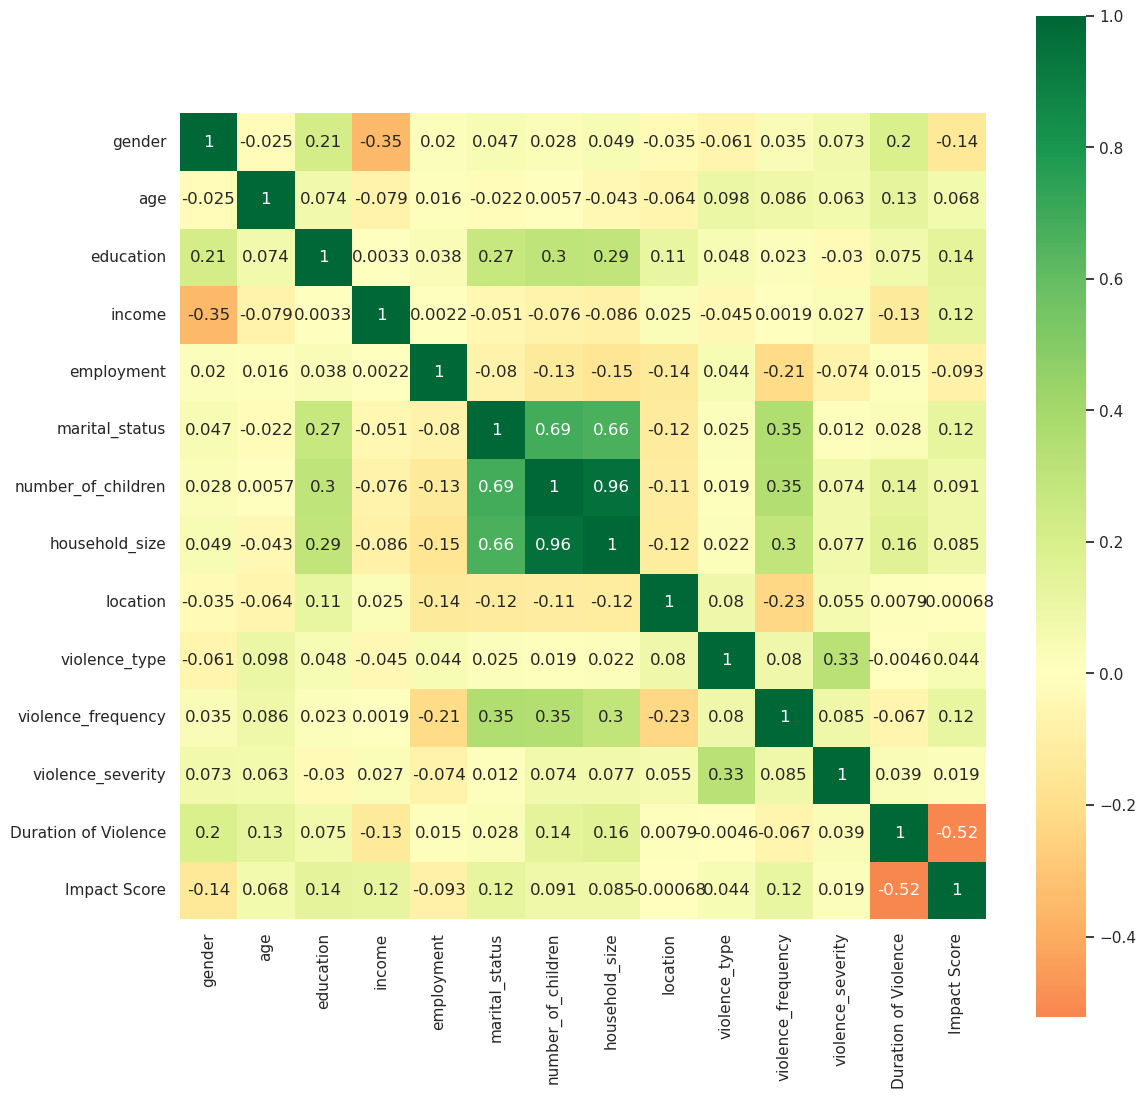

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', center=0, square=True)


In [76]:
del data['number_of_children']

<Axes: >

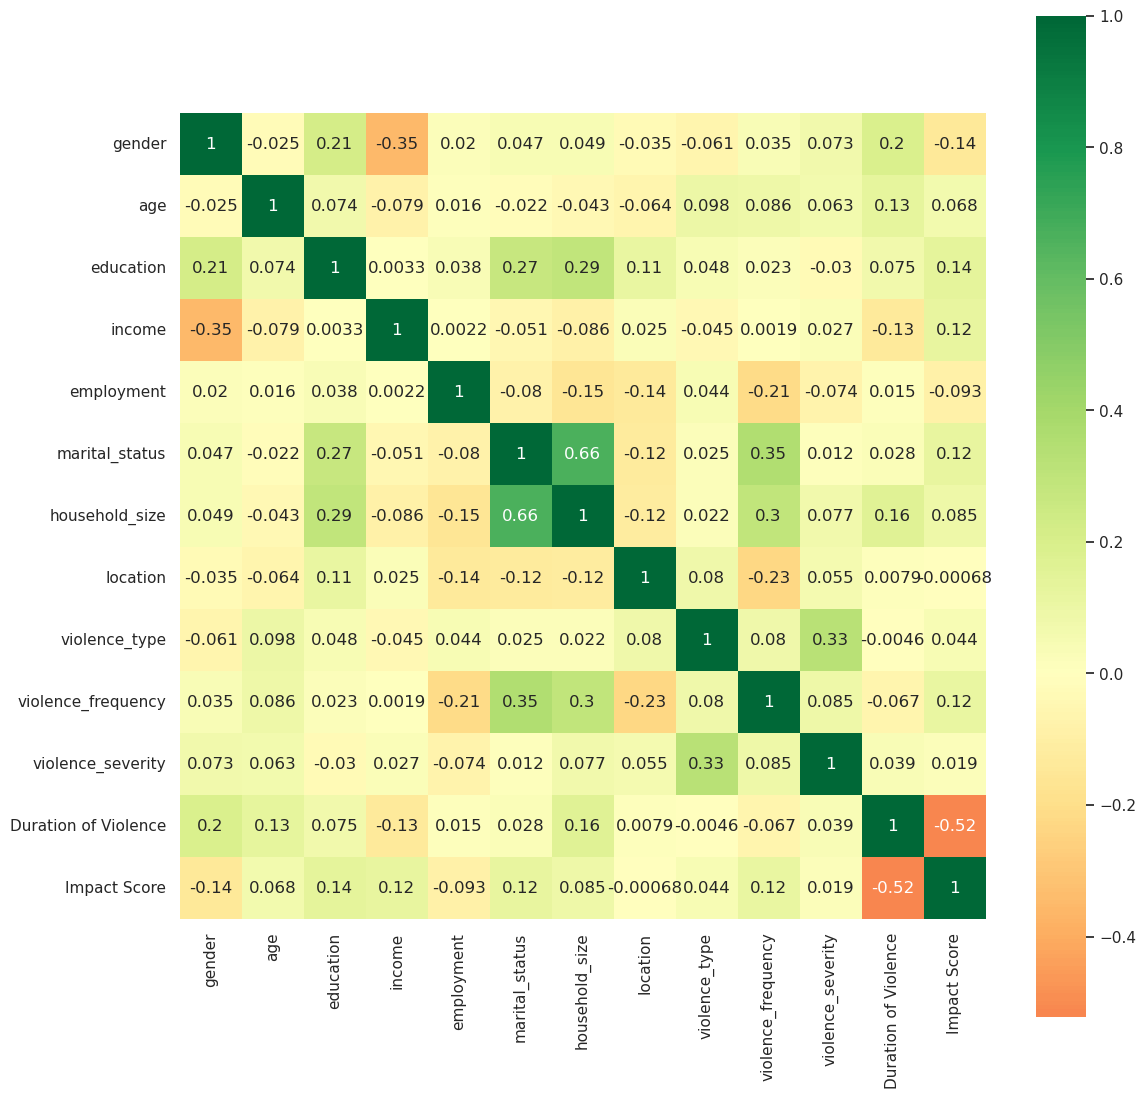

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', center=0, square=True)